In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('data/clean_spain_2018.csv')
df_non_shared = df[df['Tipo_Inmueble'] != 'Habitacion_Compartida']
df.head()

,Key,Fecha_Encuentro,Host_Key,Tipo_Inmueble,Dormitorios,Capacidad,Min_Nights,Precio,CCAA,Provincia,Precio/Capacidad
0,16530939,2017-08-14,108733091,Inmueble_Completo,7.0,13.0,2.0,115.0,La_Rioja,La_Rioja,8.846154
1,21897359,2018-04-05,41744662,Inmueble_Completo,0.0,5.0,2.0,72.0,La_Rioja,La_Rioja,14.400000
2,16169325,2017-08-14,98329255,Inmueble_Completo,0.0,16.0,2.0,174.0,La_Rioja,La_Rioja,10.875000
3,14032775,2017-08-14,71144354,Inmueble_Completo,0.0,5.0,1.0,81.0,La_Rioja,La_Rioja,16.200000
4,18608735,2017-08-14,129246172,Inmueble_Completo,4.0,10.0,2.0,215.0,La_Rioja,La_Rioja,21.500000


Estadísticas sobre precios

<AxesSubplot: xlabel='Precio', ylabel='CCAA'>

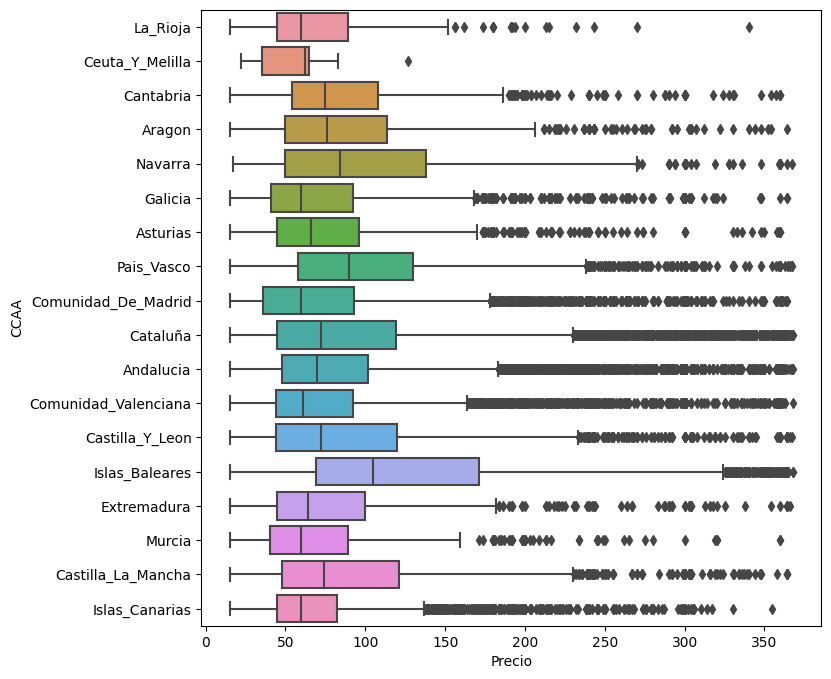

In [3]:
plt.figure(figsize=(8,8))
sns.boxplot(data = df_non_shared, x = 'Precio', y = 'CCAA')

Estadísticas sobre densidad publicitaria

In [46]:
density_per_provinces = df['Provincia'].value_counts()
np.round(((density_per_provinces.values)/(density_per_provinces.values.sum()))*100, 2)

array([17.84, 12.05,  9.14,  6.17,  5.71,  5.47,  4.34,  4.31,  3.88,
        3.72,  2.78,  2.73,  1.53,  1.52,  1.39,  1.33,  1.22,  1.14,
        1.06,  1.05,  0.92,  0.87,  0.86,  0.72,  0.71,  0.55,  0.51,
        0.47,  0.43,  0.42,  0.41,  0.37,  0.37,  0.36,  0.33,  0.32,
        0.32,  0.3 ,  0.28,  0.27,  0.25,  0.24,  0.22,  0.21,  0.18,
        0.17,  0.17,  0.16,  0.12,  0.11,  0.02,  0.  ])

([<matplotlib.patches.Wedge at 0x29a5dc7e550>,
 [Text(0.7736357103590917, 0.7819768459853422, 'Cataluña'),
  Text(-0.7748301555187301, 0.8497871675300943, 'Andalucía'),
  Text(-1.0584957805522954, -0.2993103448813406, 'Comunidad de Madrid'),
  Text(-0.5915070831391107, -0.9274262076285431, 'Comunidad Valeniana'),
  Text(-0.02748178861629557, -1.0996566515483137, 'Islas Baleares'),
  Text(0.38109003030452887, -1.0318771190420366, 'Islas Canarias'),
  Text(0.6465442210728418, -0.8899329020759444, 'País Vasco'),
  Text(0.7930417721304699, -0.7622891496382223, 'Galicia'),
  Text(0.9091186752742292, -0.6192763795492533, 'Castilla y León'),
  Text(0.9809836084233616, -0.49766571110001223, 'Asturias'),
  Text(1.0224785373991643, -0.40563239584390465, 'Cantabria'),
  Text(1.053440435777914, -0.31664372450443273, 'Castilla La Mancha'),
  Text(1.0745137662074773, -0.23541488107301714, 'Aragón'),
  Text(1.0869756051915183, -0.16877213549200862, 'Murcia'),
  Text(1.0945626565243598, -0.10923639934

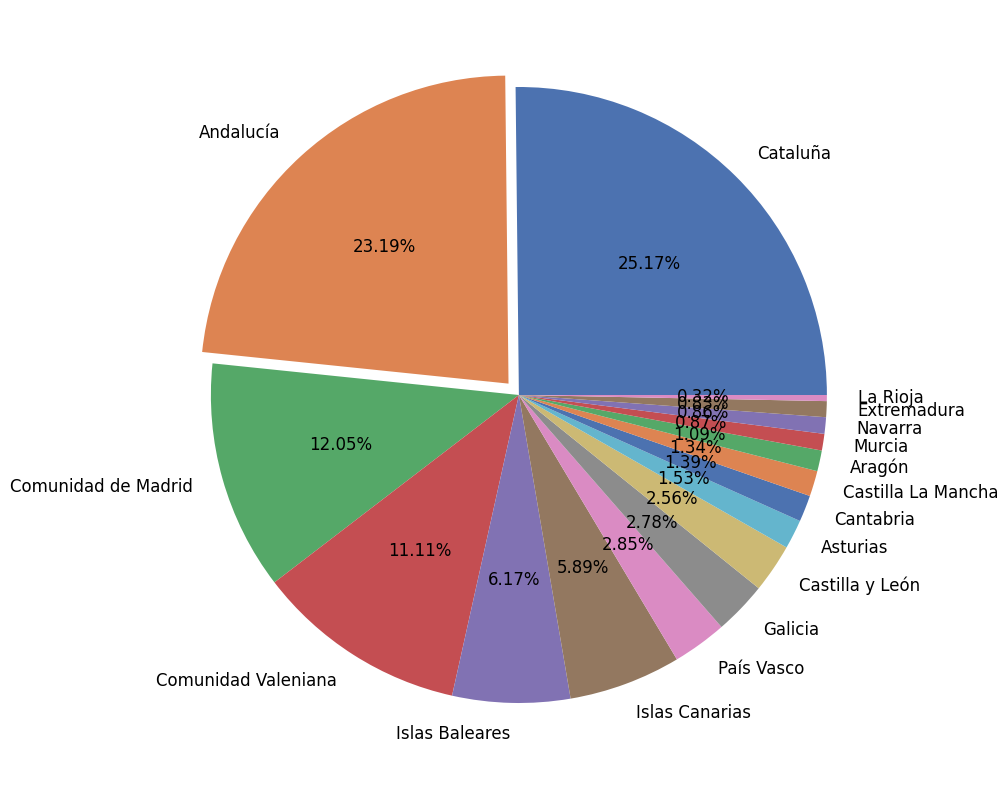

In [25]:
density_per_ccaa_data = df['CCAA'].value_counts()[0:-1]

plt.figure(figsize = (10,10))
plt.pie(x = density_per_ccaa_data.values, 
        labels = ['Cataluña', 'Andalucía', 'Comunidad de Madrid', 'Comunidad Valeniana', 'Islas Baleares', 'Islas Canarias', 'País Vasco', 'Galicia',
                  'Castilla y León', 'Asturias', 'Cantabria', 'Castilla La Mancha', 'Aragón', 'Murcia', 'Navarra', 'Extremadura', 'La Rioja'], 
        autopct='%1.2f%%',
        textprops= {'fontsize': 12},
        colors= sns.color_palette('deep'),
        explode= np.array([0] + [0.05]+ [0]*15))